<a href="https://colab.research.google.com/github/Renatolopo/Inteligencia-Computacional/blob/main/IIC_Associando_faces_por_similaridade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grupo: 
Renato Lopo Montalvão Júnior 

Mayk Brendon de Almeida Antunes

O conjunto de dados CelebA contém 202.599 imagens de 10.177 pessoas distintas, entre homens e mulheres com as mais diferentes características (com ou sem óculos, barba, maquiagem, etc). Os dados estão disponíveis gratuitamente a partir do link http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html



Pede-se:
1. Faça download dos dados e selecione aleatoriamente 500 imagens;
2. Selecione 5 imagens aleatoriamente e utilize o algoritmo de k-Vizinhos mais próximos para localizar as 3 imagens mais parecidas com cada uma delas utilizando a Distância Euclidiana;
3. Repita o processo anterior mas utilizando a Distância de Manhattan;
4. Utilize k-means e o k-medoids para encontrar 10 clusters, com no mínimo 20 iterações;
5. Treine um SOM bidimensional com uma grade de 5 x 5 com os dados selecionados e plote o conteúdo de cada célula;
6. Treine os dados com o t-SNE com dimensão de saída igual à 2, associando o embedding gerado à cada imagem. Plote todas as imagens associadas à localização do embedding.



## 1. Faça download dos dados e selecione aleatoriamente 500 imagens

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def gerar_base(path):
  imgs = os.listdir(path)
  base = []
  for img in imgs:
    img = cv2.imread(path+img)
    base.append(img)
  return np.array(base)

In [ ]:
path = '/content/drive/MyDrive/Outros/500_random/'
celeba = gerar_base(path)

#### Obs:
As 500 imagens foram selecionadas aleatoriamente atraves de outro script, e foi feito upload delas no google driver.

In [ ]:
celeba.shape

(500, 218, 178, 3)

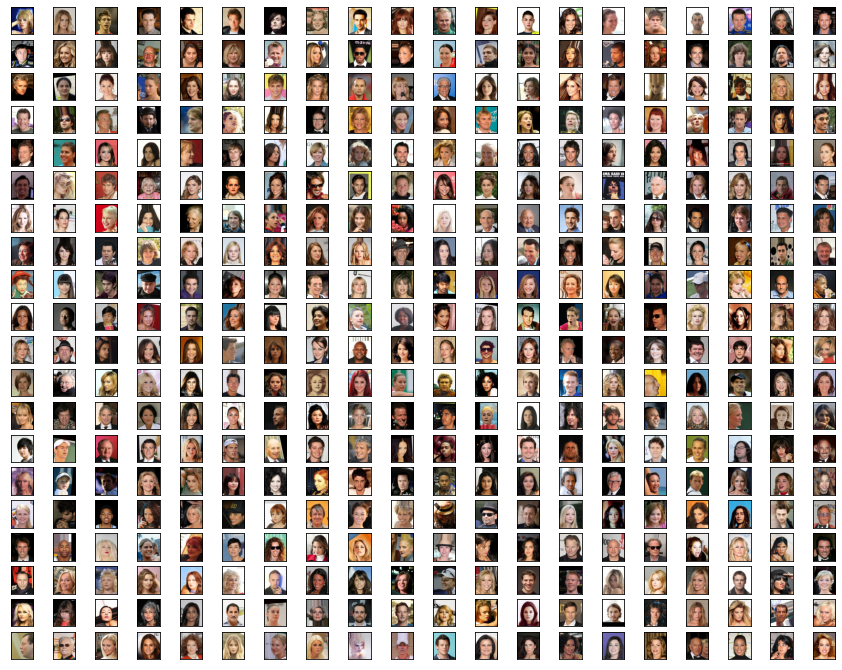

In [ ]:
fig, ax = plt.subplots(20,20,figsize=(15,12))
amostras = np.zeros((500,116412,))
for ct1, axx in enumerate(ax):
  for ct2, axy in enumerate(axx):
    axy.imshow(cv2.cvtColor(celeba[ct1*20 + ct2], cv2.COLOR_BGR2RGB))
    amostras[ct1*20 + ct2] = celeba[ct1*20 + ct2].flatten()
    axy.set_xticks([]) 
    axy.set_yticks([]) 

## 2. Selecione 5 imagens aleatoriamente e utilize o algoritmo de k-Vizinhos mais próximos para localizar as 3 imagens mais parecidas com cada uma delas utilizando a Distância Euclidiana;

* Distância Euclidiana
$$ a,b \in \mathbb{R}^n $$

<br />
 
$$d(a,b) = \sqrt{ \sum_{i=1}^n (a_i - b_i)^2 }$$

In [ ]:
def euclidiana(a: np.ndarray, b: np.ndarray) -> np.float:
  l = len(a)
  return np.sqrt(np.sum([(a[i] - b[i])**2 for i in range(l)]))

* k-Vizinhos Mais Próximos (k-NN)

In [ ]:
def knn(dados: np.ndarray, instancia_alvo: np.ndarray, k:int = 1, fdist = euclidiana):
  n = dados.shape[0]
  distancias = [ fdist(instancia_alvo, dados[x]) for x in range(n) ]
  vizinhos = sorted(distancias)[1:k +1]
  indices_vizinhos = [distancias.index(v) for v in vizinhos]
  return indices_vizinhos

In [ ]:
# Plot da imagen alvo e seus vizinhos
def plot(img_alvo, vizinhos, n_img):
  imagens = [img_alvo] + vizinhos
  fig, ax = plt.subplots(1, len(imagens) ,figsize=(15, 10))
  for i, axx in enumerate(ax):
    if i == 0:
      axx.set_title(f'Imagen alvo {n_img +1}')
    else:
      axx.set_title(f'Vizinho {i}')
    axx.imshow(cv2.cvtColor(celeba[imagens[i]], cv2.COLOR_BGR2RGB))


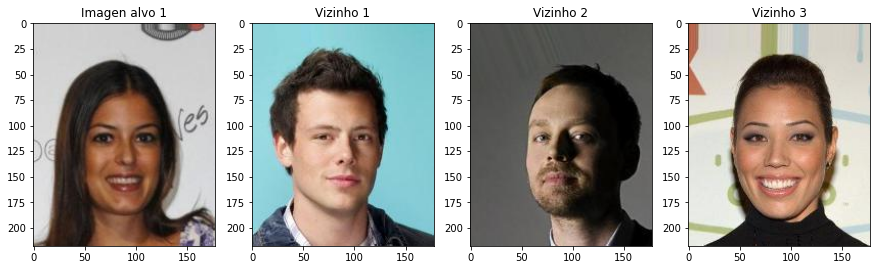

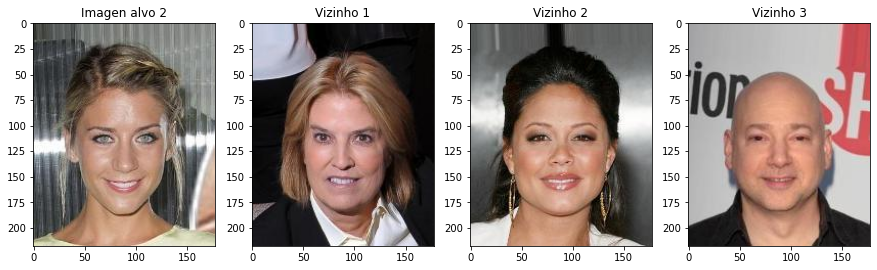

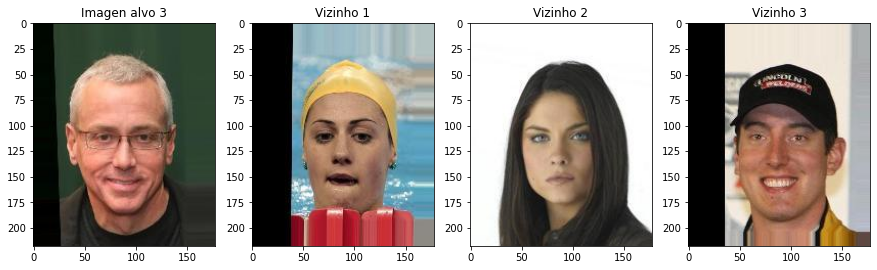

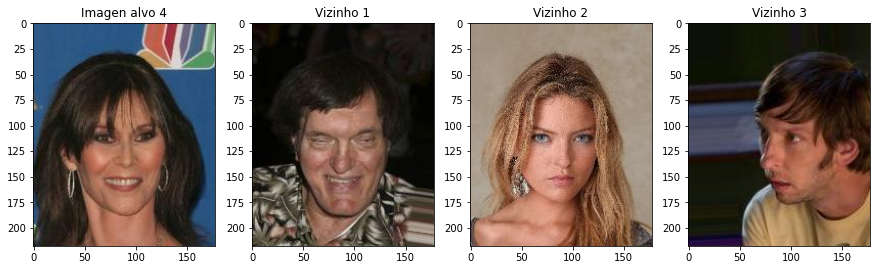

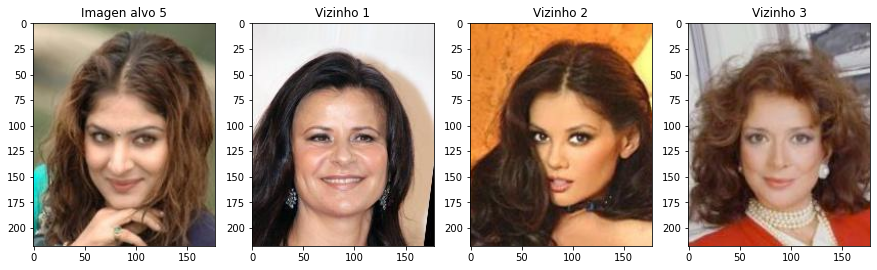

In [ ]:
for i in range(5):
  index = np.random.choice(celeba.shape[0])
  k = 3
  vizinhos = knn(celeba, celeba[index], k=k)
  plot(index, vizinhos, i)


## 3. Repita o processo anterior mas utilizando a Distância de Manhattan

### Distância de Manhattan

$$ a,b \in \mathbb{R}^n $$

<br />
 
$$d(a,b) = \sum_{i=1}^n |a_i - b_i| $$

In [ ]:
def manhattan(a: np.ndarray, b: np.ndarray) -> np.float:
  l = len(a)
  return np.sum([np.abs(a[i] - b[i]) for i in range(l)])

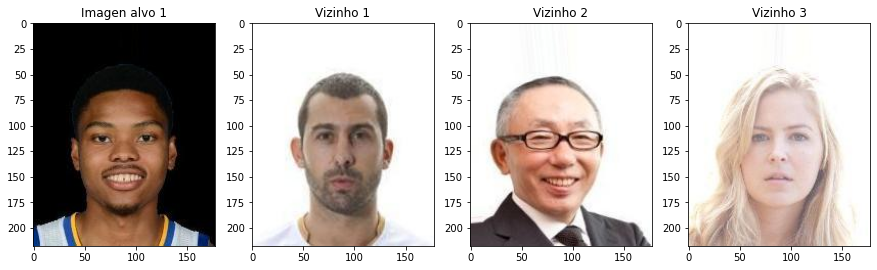

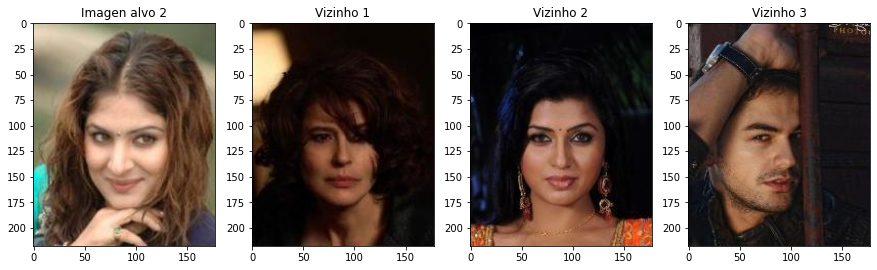

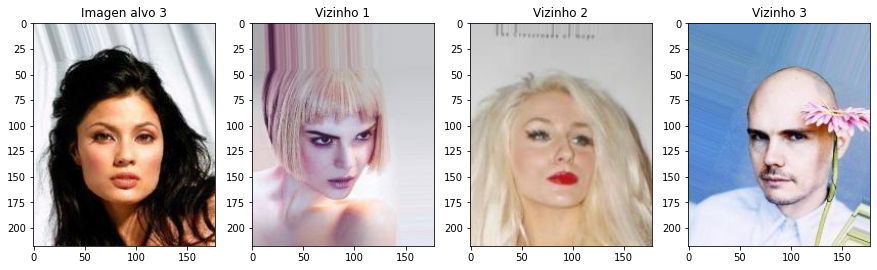

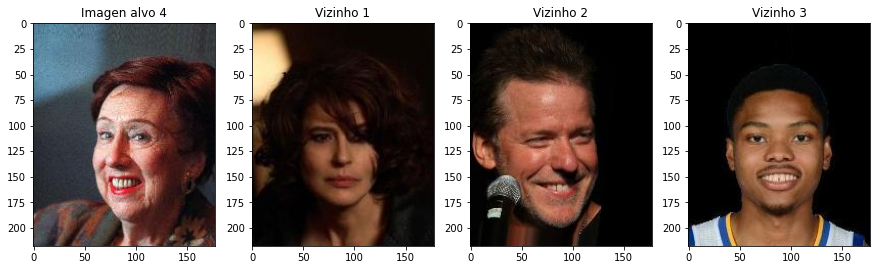

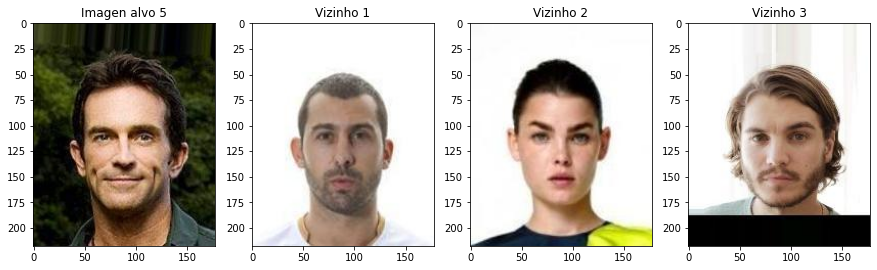

In [ ]:
for i in range(5):
  index = np.random.choice(celeba.shape[0])
  k = 3
  vizinhos = knn(celeba, celeba[index], k=k, fdist = manhattan)
  plot(index, vizinhos, i)

## 4. Utilize k-means e o k-medoids para encontrar 10 clusters, com no mínimo 20 iterações

### K Médias (K-Means)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 10
kmeans = KMeans(n_clusters = k, random_state=0, n_init=20).fit(amostras)

In [ ]:
clusters1 = kmeans.cluster_centers_

Visualizando os valores dos clusters

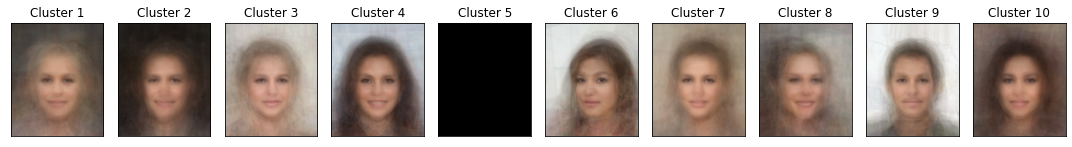

In [ ]:
fig, ax = plt.subplots(1,k,figsize=(15, 10))
for ct, axx in enumerate(ax):
  axx.set_title("Cluster {}".format(ct+1))
  img = clusters1[ct].reshape((218, 178, 3)).astype(np.uint8)
  axx.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  axx.set_xticks([]) 
  axx.set_yticks([])

plt.tight_layout() 

n entendi pq as imagens estão assim ;(

### K Medianas (K-Medoids)

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7 MB 19.7 MB/s 


In [ ]:
kmedoids = KMedoids(n_clusters = k, random_state=0, max_iter=20).fit(amostras)

In [ ]:
clusters =  kmedoids.cluster_centers_

Visualizando os valores dos clusters


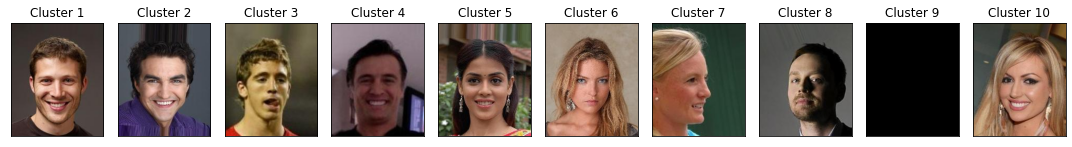

In [ ]:
fig, ax = plt.subplots(1,k,figsize=(15, 10))
for ct, axx in enumerate(ax):
  axx.set_title("Cluster {}".format(ct+1))
  img = clusters[ct].reshape((218, 178, 3)).astype(np.uint8)
  axx.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  axx.set_xticks([]) 
  axx.set_yticks([])

plt.tight_layout() 

## 5. Treine um SOM bidimensional com uma grade de 5 x 5 com os dados selecionados e plote o conteúdo de cada célula

## SOM - Mapas Auto-Organizáveis

$$\mathcal{E} = SOM(\mathcal{D})$$

Onde:
* $\mathcal{D} \in \mathbb{R}^{m \times n}$
  * $m$: número de instâncias
* $\mathcal{E} \in \mathbb{R}^{x \times y \times n}$
  * $x,y \in \mathbb{N}^+$: dimensões da grade

In [ ]:
import numpy as np
from time import sleep, time


class SOM:
    # It's gonna be an array m x n x dim, where m and n are the nodes' grid and
    # dim is the weight's dimension.
    w_nodes = None
    
    alpha0 = None # It's the initial learning rate
    sigma0 = None # It's the initial radius
    data_in = None # The input data
    grid = None   # The lattice of the grid
    
    def __init__ (self, data_in, grid=(10, 10), alpha=0.1, sigma=None):
        dim = data_in.shape[1]
        self.w_nodes = np.random.uniform(-1, 1, [grid[0], grid[1], dim])
        #self.wNodes = np.random.randn (grid[0], grid[1], dim)    
        
        self.alpha0 = alpha
        if (sigma is None):
            self.sigma0 = max(grid) / 2.0
        else:
            self.sigma0 = sigma
        
        self.data_in = np.asarray(data_in)
        self.grid = grid
        
    def train (self, max_it=100, verbose=True, analysis=False, time_sleep = 0.5):
        n_samples = self.data_in.shape[0]
        m = self.w_nodes.shape[0]
        n = self.w_nodes.shape[1]

        # The time constant needs to be computed just one time, so we so it before the loop starts        
        time_cte = (max_it / np.log(self.sigma0))
        if analysis:
            print (f"- time_cte = {time_cte}")
            
        time_init = 0
        time_end = 0
        for epc in range(max_it):
            # Computing the constants
            alpha = self.alpha0*np.exp(-epc/time_cte)
            sigma = self.sigma0 * np.exp(-epc/time_cte)
            if verbose:
                print (f"- Epoch: {epc}\n- Expected time: {(time_end-time_init) * (max_it - epc)} sec")
            time_init = time()

            for k in range(n_samples):
                
                # Getting the winner node
                mat_dist = self.distance (self.data_in[k, :], self.w_nodes)
                pos_win = self.get_win_node_pos(mat_dist)
                deltaW  = 0                
                h = 0
                for i in range(m):
                    for j in range(n):
                        # Computing the distance between two nodes
                        dNode = self.get_distance_nodes([i, j], pos_win)
                        
                        
                        #if dNode <= sigma: 
                            
                        # Computing the winner node's influence
                        h = np.exp ((-dNode**2)/(2*sigma**2))
                        
                        # Updating the weights
                        deltaW = (alpha * h * (self.data_in[k, :] - self.w_nodes[i, j, :]))
                        self.w_nodes[i, j, :] += deltaW
                            
                        if analysis:  
                            print('Epoch =', epc)
                            print('Sample =', k)
                            print('-' * 50)
                            print('alpha =', alpha)
                            print('sigma =', sigma)
                            print('h =',  h)
                            print('-' * 50)
                            print(f'Winner Node = [{pos_win[0]},{pos_win[1]}]')
                            print(f'Current Node = [{i},{j}]')
                            print('dist. nodes =', dNode)
                            print('deltaW =', deltaW)
                            print('wNode before =', self.w_nodes[i, j, :])
                            print('wNode after =', self.w_nodes[i, j, :] + deltaW)
                            print('\n')
                            sleep(time_sleep)

            time_end = time()
        

    # This code uses the Euclidean distance. You may change this distance, if you want to.
    # This method computes the distance between the inputs and weights throughout the 3D matrix
    def distance (self,a,b):
        return np.sqrt(np.sum((a-b)**2,2,keepdims=True))        

    # Method to get the distance between two nodes in the grid
    def get_distance_nodes (self, n1, n2):
        n1 = np.asarray(n1)
        n2 = np.asarray(n2)
        return np.sqrt(np.sum((n1-n2)**2))
        
    # This method gets the position of the winner node     
    def get_win_node_pos (self, dists):
        arg = dists.argmin()
        m = dists.shape[0]
        return arg//m, arg%m
        
    # Method to get the centroid of a input data
    def getCentroid (self, data):
        data = np.asarray(data)        
        N = data.shape[0]
        centroids = list()
        
        for k in range(N):
            matDist = self.distance (data[k,:], self.w_nodes)
            centroids.append (self.get_win_node_pos(matDist))
            
        return centroids
        
    # Methods to save and load trained nodes
    def save_trained_som (self, fileName='trainedSOM.csv'):
        np.savetxt(fileName, self.w_nodes)

    def set_trained_som (self, fileName):
        self.w_nodes = np.loadtxt(fileName)

In [ ]:
som = SOM(amostras, grid=(5,5))
som.train(max_it=10)

- Epoch: 0
- Expected time: 0 sec
- Epoch: 1
- Expected time: 97.69484996795654 sec
- Epoch: 2
- Expected time: 100.21770477294922 sec
- Epoch: 3
- Expected time: 74.74923586845398 sec
- Epoch: 4
- Expected time: 70.68809080123901 sec
- Epoch: 5
- Expected time: 51.84362292289734 sec
- Epoch: 6
- Expected time: 41.65588092803955 sec
- Epoch: 7
- Expected time: 33.44122052192688 sec
- Epoch: 8
- Expected time: 22.561448574066162 sec
- Epoch: 9
- Expected time: 10.786264181137085 sec


In [ ]:
C = som.w_nodes

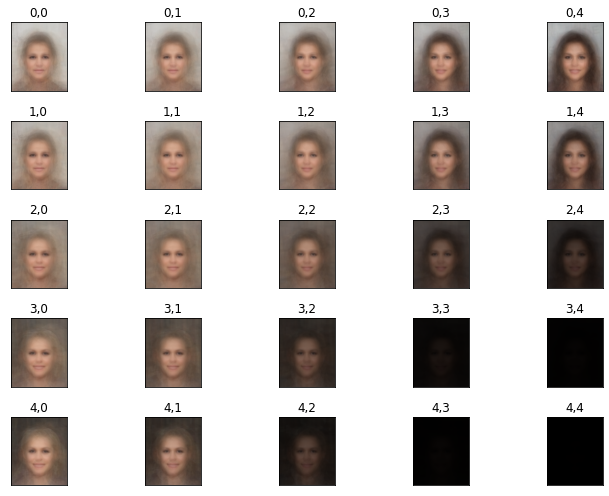

In [ ]:
grid = (5,5)
fig, ax = plt.subplots(grid[0], grid[1], figsize=(10,7))
for ct1, axx in enumerate(ax):
  for ct2, axy in enumerate(axx):
    ix = (ct1, ct2)
    img = C[ix].reshape((218, 178, 3)).astype(np.uint8)
    axy.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axy.set_xticks([]) 
    axy.set_yticks([]) 
    axy.set_title("{},{}".format(ct1, ct2))

plt.tight_layout()

## 6. Treine os dados com o t-SNE com dimensão de saída igual à 2, associando o embedding gerado à cada imagem. Plote todas as imagens associadas à localização do embedding


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=10000)
embeddings = tsne.fit_transform(amostras)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.040s...
[t-SNE] Computed neighbors for 500 samples in 1.994s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 10841.341840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.562931
[t-SNE] KL divergence after 850 iterations: 0.428830


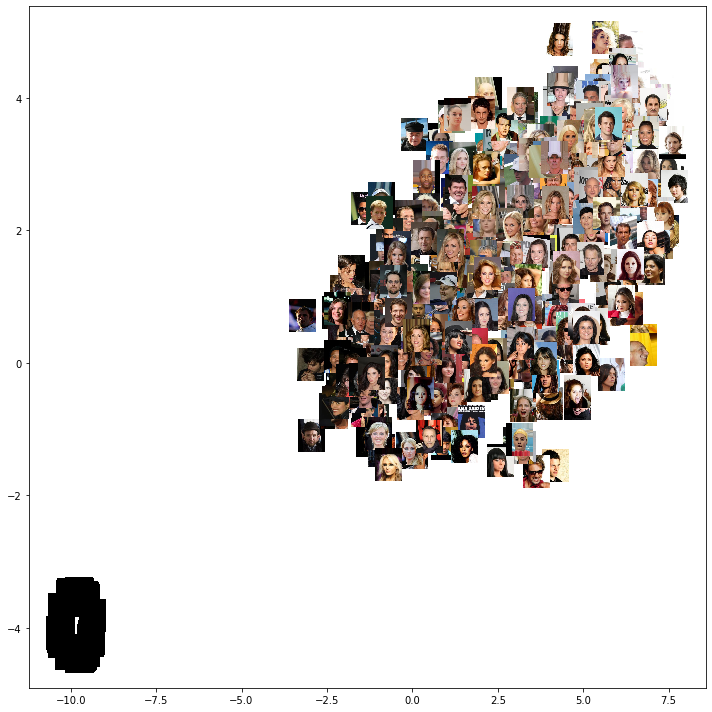

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots(1, 1, figsize=(10,10))
a = []
for ix in range(embeddings.shape[0]):
  x,y = embeddings[ix]
  img = amostras[ix].reshape((218, 178, 3)).astype(np.uint8)
  oi = OffsetImage(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), zoom = 0.15)
  box = AnnotationBbox(oi, (x, y), frameon=False)
  a.append(ax.add_artist(box))
plt.scatter(embeddings[:,0], embeddings[:,1])

plt.tight_layout()